# Checking the precision of the Poisson equation solver
In this notebook, we will check the accuracy of the Poisson equation solver used inside the proximal solver.


In [13]:
# Importing the required libraries
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys
sys.path.append('../../..')
from proximal.backend_extension import get_backend_ext
from proximal.dynamicUOT import poisson_
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.animation as animation
import matlab.engine
import io

## Problem setting
We will solve the Poisson equation
$\begin{equation} \Delta u + f = 0 \end{equation} \tag*{}$
in the case $f(t, x) = 8\pi^2 \cos{(\pi(2t-1))}\cos{(\pi(2t-1))}$. We assume that the grid points are on the centered grid with Neumman boundary condition on the staggered boundary. According to the general theory, we should expect $O(1/N^2)$ error where $N$ is the grid size.


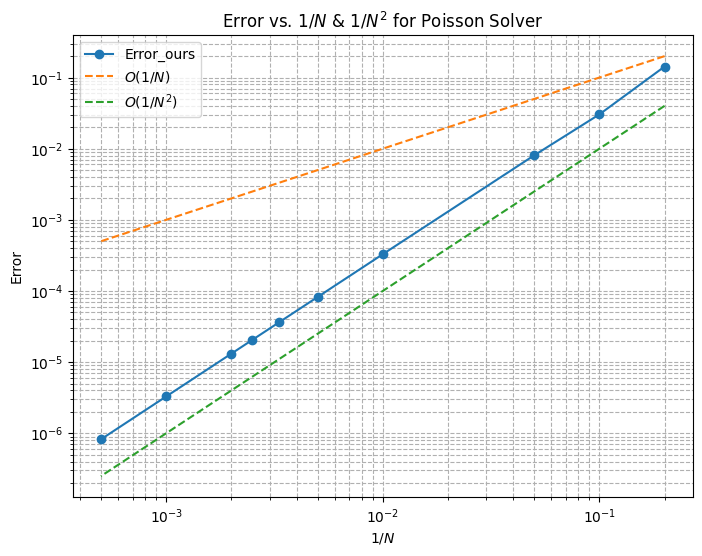

In [ ]:
resolutions = [5, 10, 20, 100, 200, 300, 400, 500, 1000, 2000]  # List of resolutions (N=N_0=N_1)
ll = (1.0, 1.0)  # Domain lengths
errors_ours = []
errors_matlab = []

"""
Our code
"""

for N in resolutions:
    """
    Our Code
    """
    t = ll[0] * (np.arange(N) + 0.5) / N
    x = ll[1] * (np.arange(N) + 0.5) / N
    T, X = np.meshgrid(t, x)
    
    # True solution and source term
    true_solution = np.cos(np.pi * (2 * T - 1)) * np.cos(np.pi * (2 * X - 1))
    f = 8 * np.pi**2 * np.cos(np.pi * (2 * T - 1)) * np.cos(np.pi * (2 * X - 1))
    
    # Apply Poisson solver
    nx = get_backend_ext(f)
    poisson_(f, ll, False, nx)
    
    # Compute error
    order = 30
    error_ours = np.abs(f - true_solution).max()
    errors_ours.append(error_ours)


# Plot error vs 1/N
plt.figure(figsize=(8, 6))
plt.loglog(1 / np.array(resolutions), errors_ours, marker='o', label='Error_ours')
#plt.loglog(1 / np.array(resolutions), errors_matlab, marker='o', label='Error_matlab')
plt.loglog(1 / np.array(resolutions), 1 / np.array(resolutions), '--', label=r'$O(1/N)$')
plt.loglog(1 / np.array(resolutions), (1 / np.array(resolutions))**2, '--', label=r'$O(1/N^2)$')
plt.xlabel(r'$1/N$')
plt.ylabel('Error')
plt.title(r'Error vs. $1/N$ & $1/N^2$ for Poisson Solver')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

We observe that the error is of the quadratic order, which is correct.